# Proyecto Módulo 1 sobre Python:
En el siguiente notebook vamos a trabajar con PySpark. En él, vamos a usar las sentencias necesarias para obtener una muestra de un conjunto de datos.

El primer paso que debemos dar es conectar Google Colab con nuestro Google Drive. Para ello, lanzaremos el siguiente trozo de código.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


Una vez hemos conectado Google Drive, pasamos a instalar Apache Spark en nuestro notebook. En concreto, vamos a trabajar con la versión 3.4.4.

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
!wget -q --show-progress https://dlcdn.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz

spark-3.5.5-bin-had 100%[===================>] 382.16M   224MB/s    in 1.7s    


In [5]:
!ls


drive  sample_data  spark-3.5.5-bin-hadoop3.tgz


In [6]:
!tar xf  spark-3.5.5-bin-hadoop3.tgz

Además de la instalación habitual, hay un paso más que debemos dar, y es la instalación de la librería *findspark*. Esta librería nos permitirá encontrar la instalación de Apache Spark en nuestro sistema.

Establecemos también un par de variables de entorno.

In [7]:
!pip install -q findspark
!pip show findspark

Name: findspark
Version: 2.0.1
Summary: Find pyspark to make it importable.
Home-page: https://github.com/minrk/findspark
Author: Min RK
Author-email: benjaminrk@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

In [9]:
import findspark
findspark.init()

In [10]:
findspark.find()

'/content/spark-3.5.5-bin-hadoop3'

Una vez tenemos instalado nuestro framework, es momento de crear nuestra variable SparkSession, de la cual parten la mayoría de funcionalidades de SparkSQL

In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Pyspark_SQL")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [12]:
spark

Además de la instalación habitual, hay un paso más que debemos dar, y es la instalación de la librería *findspark*. Esta librería nos permitirá encontrar la instalación de Apache Spark en nuestro sistema.

Establecemos también un par de variables de entorno.

Una vez tenemos instalado nuestro framework, es momento de crear nuestra variable SparkSession, de la cual parten la mayoría de funcionalidades de SparkSQL

### Lectura de datos

Ahora sí, podemos comenzar a trabajar con SparkSQL. Comenzaremos leyendo nuestro conjunto de datos, el cual contiene información de las calificaciones de alumnos en algunas materias.

In [13]:
!pwd

/content


In [14]:
import os
print(os.getcwd())

/content


In [15]:
# Importar las librerías necesarias
from google.colab import files
import pandas as pd
import numpy as np

data_path = '/content/sample_data/StudentsSocialMediaAddiction_Clean.csv'

# Cargar el archivo Excel
excel_df = pd.read_csv(data_path)

# 3. Revisar los tipos de datos en el DataFrame de pandas
print("Tipos de datos antes de la conversión:")
print(excel_df.dtypes)

# 4. Uniformizar los tipos de datos
# Supongamos que quieres que todas las columnas numéricas sean del tipo 'int'
# También puedes optar por 'float' si es necesario

# Cambiar tipos de datos a int, si son numéricos
for column in excel_df.columns:
    if pd.api.types.is_numeric_dtype(excel_df[column]):
        excel_df[column] = pd.to_numeric(excel_df[column], downcast='integer', errors='coerce')

# Verificar los tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
print(excel_df.dtypes)

# 5. Convertir el DataFrame de pandas a un DataFrame de PySpark
df = spark.createDataFrame(excel_df)

# Verificar la estructura del DataFrame de PySpark
df.printSchema()
df.show()

Tipos de datos antes de la conversión:
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object
Tipos de datos después de la conversión:
Student_ID                        int16
Age                                int8
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score       





### Cálculos

In [16]:
#Importamos las librerías necesarias
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, IndexToString
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

#Modificación del tipo de dato a float
df = df.withColumn('Avg_Daily_Usage_Hours', col('Avg_Daily_Usage_Hours').cast("float"))
df = df.withColumn('Sleep_Hours_Per_Night', col('Sleep_Hours_Per_Night').cast("float"))
df = df.withColumn('Mental_Health_Score', col('Mental_Health_Score').cast("float"))
df = df.withColumn('Conflicts_Over_Social_Media', col('Conflicts_Over_Social_Media').cast("float"))
df = df.withColumn('Addicted_Score', col('Addicted_Score').cast("float"))

# Mostrar el esquema para verificar los tipos de datos
df.printSchema()
df.show()

root
 |-- Student_ID: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Academic_Level: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Avg_Daily_Usage_Hours: float (nullable = true)
 |-- Most_Used_Platform: string (nullable = true)
 |-- Affects_Academic_Performance: string (nullable = true)
 |-- Sleep_Hours_Per_Night: float (nullable = true)
 |-- Mental_Health_Score: float (nullable = true)
 |-- Relationship_Status: string (nullable = true)
 |-- Conflicts_Over_Social_Media: float (nullable = true)
 |-- Addicted_Score: float (nullable = true)

+----------+---+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Healt

In [17]:
#Creación de la columna 'features'
feat = VectorAssembler(inputCols=["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night","Conflicts_Over_Social_Media","Addicted_Score"], outputCol="features")
feat_df = feat.transform(df)

In [18]:
#Mostramos como se ha creado correctamente la columna 'features'
feat_df.show()

+----------+---+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+--------------------+
|Student_ID|Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|Addicted_Score|            features|
+----------+---+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+--------------------+
|         1| 19|Female| Undergraduate| Bangladesh|                  5.2|         Instagram|                         Yes|                  6.5|                6.0|    In Relationship|                        3.0|           8.0|[5.19999980926513...|
|         2|

In [19]:
#Importamos las librerías
from pyspark.ml.clustering import BisectingKMeans

#Definimos el número de clusters que vamos a crear (5 en este caso)
bkm = BisectingKMeans().setK(5).setSeed(1)

In [20]:
#Entrenamos el modelo
model = bkm.fit(feat_df)

#Asignamos un custer a cada una de las filas de nuestro dataset
predictions = model.transform(feat_df)

#Mostramos las predicciones
predictions.show(100)

+----------+---+------+--------------+---------------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+--------------------+----------+
|Student_ID|Age|Gender|Academic_Level|        Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|Addicted_Score|            features|prediction|
+----------+---+------+--------------+---------------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+--------------------+----------+
|         1| 19|Female| Undergraduate|     Bangladesh|                  5.2|         Instagram|                         Yes|                  6.5|                6.0|    In Relationship|                        3.0|

In [21]:
# Eliminar la columna 'features' y seleccionar columnas necesarias
result_df = predictions.select("Student_Id","Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night","Conflicts_Over_Social_Media","Addicted_Score","prediction")

# Descargar tabla
output_path = '/content/sample_data/predicciones_Adiction_Students_kmeans.csv'

# Guardar las predicciones como CSV
result_df.write.mode("overwrite").csv(output_path, header=True)

In [22]:
# Representación gráfica
from pyspark.sql import functions as F

# Agrupar por el número de clúster y calcular las medias de cada variable
cluster_stats = predictions.groupBy("prediction").agg(
    F.mean("Avg_Daily_Usage_Hours").alias("mean_horas_uso_diario"),
    F.mean("Sleep_Hours_Per_Night").alias("mean_horas_dormidas_por_noche"),
    F.mean("Mental_Health_Score").alias("mean_puntuación_salud_mental"),
    F.mean("Conflicts_Over_Social_Media").alias("mean_conflictos_redes_sociales"),
    F.mean("Addicted_Score").alias("mean_puntuación_de_adiccion")
)

In [23]:
# Convertir el resultado a pandas debido a que las representaciones con PySpark son
# muy limitadas y con pandas podemos utilizar librerías como seaborn, squarify o mantplotlib.
cluster_stats_pd = cluster_stats.orderBy("prediction").toPandas()

In [24]:
# Mostrar como tabla
import pandas as pd
from IPython.display import display

# Opcional: redondear los valores
cluster_stats_pd1 = cluster_stats_pd.round(2)

# Agregar etiquetas personalizadas al DataFrame
cluster_stats_pd1["riesgo"] = cluster_stats_pd["prediction"].map({
    0: "Usuarios equilibrados",
    1: "Vigilancia preventiva",
    2: "Riesgo de dependencia",
    3: "Riesgo alto de adicción",
    4: "Adicción severa"
})

# Mostrar tabla en el notebook
display(cluster_stats_pd1)

,prediction,mean_horas_uso_diario,mean_horas_dormidas_por_noche,mean_puntuación_salud_mental,mean_conflictos_redes_sociales,mean_puntuación_de_adiccion,riesgo
0,0,3.21,8.11,7.83,1.56,4.02,Usuarios equilibrados
1,1,4.34,7.52,7.05,1.98,5.10,Vigilancia preventiva
2,2,4.21,7.85,6.35,2.96,6.43,Riesgo de dependencia
3,3,5.20,6.49,5.79,3.06,7.11,Riesgo alto de adicción
4,4,6.46,5.58,4.99,4.04,8.26,Adicción severa


Como podemos observar en la tabla, los clusters representan el nivel de adicción de los estudiantes a las redes sociales:
- **Grupo 0:** Indica un bajo riesgo de adicción.
- **Grupo 1:** Indica un uso moderado y estable.
- **Grupo 2:** Indica un comienzo de riesgo de adicción.
- **Grupo 3:** Indica un riesgo alto de adicción.
- **Grupo 4:** Indica a los más adicto y vulnerables.

In [25]:
# Instalar la librería squarify
!pip install squarify
!pip install squarify

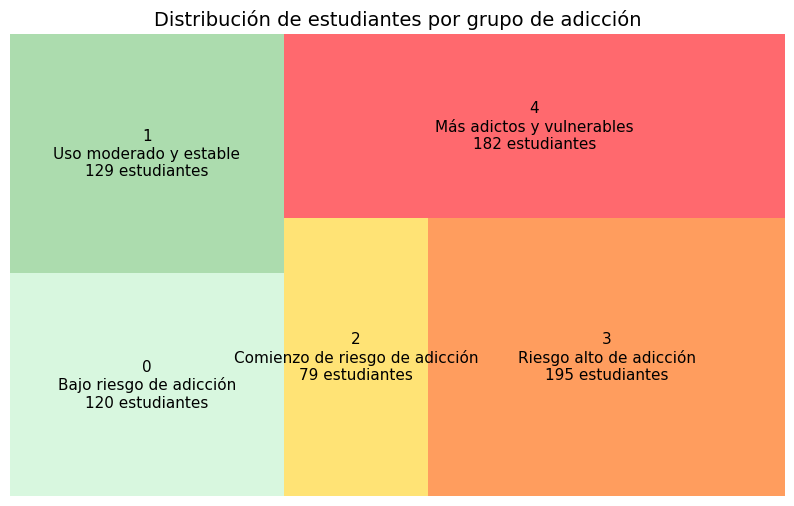

In [27]:
# Lectura del archivo extraido con la columna de predicciones
data_path_predicciones = '/content/sample_data/predicciones_Adiction_Students_kmeans.csv/part-00000-270a0c48-5003-4d6a-bbff-86fd9c8d32ac-c000.csv'

# Cargar el archivo Excel
excel_df_predicciones = pd.read_csv(data_path_predicciones)

import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Contar cuántos estudiantes hay por cluster
counts = excel_df_predicciones["prediction"].value_counts().sort_index()

# Definir etiquetas descriptivas
labels = [
    f"0\nBajo riesgo de adicción\n{counts[0]} estudiantes",
    f"1\nUso moderado y estable\n{counts[1]} estudiantes",
    f"2\nComienzo de riesgo de adicción\n{counts[2]} estudiantes",
    f"3\nRiesgo alto de adicción\n{counts[3]} estudiantes",
    f"4\nMás adictos y vulnerables\n{counts[4]} estudiantes"
]

# Colores personalizados (puedes ajustarlos)
colors = ['#d4f7dc', '#a3d9a5', '#ffe066', '#ff924c', '#ff595e']

# Crear el treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=counts.values, label=labels, color=colors, alpha=0.9, text_kwargs={'fontsize':11})
plt.axis('off')
plt.title("Distribución de estudiantes por grupo de adicción", fontsize=14)
plt.show()